In [74]:
import pandas as pd
import numpy as np
import mysql.connector
from sqlalchemy import create_engine


In [75]:
def db_connect():
    database_name = 'travelwanders' 
    db = mysql.connector.connect(host='localhost', user='root', password='', database='travelwanders')
    return db

In [76]:
def fetch_db_data():
    db = db_connect()
    cursor = db.cursor(buffered=True)
    tb_list = ['r_location','r_ratings']
    result = []
    for tb in tb_list:
        sql = 'select * from '+tb
        cursor.execute(sql)
        tb = cursor.fetchall()
        result.append(tb)
    return result[0],result[1]

In [77]:
location,ratings = fetch_db_data()

In [78]:
location = pd.DataFrame(data=location,columns=['location_id','city','destination','description','index','image_url'])
ratings = pd.DataFrame(data=ratings,columns=['u_id','index','location_rating'])

In [79]:
location

,location_id,city,destination,description,index,image_url
0,1,Kathmandu,Kathmandu Durbar Square,It is one of three Durbar Squares in the Kathm...,10,https://www.inditales.com/wp-content/uploads/2...
1,2,Kathmandu,Shree Pashupatinath Temple,It is one of the 5 holiest Shiva temple in the...,11,https://bsmedia.business-standard.com/_media/b...
2,3,Kathmandu,Swayambhunath Stupa,It is the oldest temple standing in Nepal whos...,12,https://worldtravelfamily.com/wp-content/uploa...
3,4,pokhara,Gupteswor mahadev,Gupteshwor Mahadev Cave is considered the long...,13,https://www.vivaanadventure.com/wp-content/upl...
4,5,pokhara,Mahendra cave,"Mahendra Cave is a cave located in Pokhara-16,...",14,https://www.holidify.com/images/cmsuploads/com...
...,...,...,...,...,...,...
61,62,Kirtipur,TauDaha,Taudaha?Lake is a small lake in the outskirts ...,77,https://www.khojnu.com/wp-content/uploads/2018...
62,63,Kirtipur,Chovar,Chobhar is a village in Kathmandu District in ...,78,https://www.teensyideas.com/wp-content/uploads...
63,64,Kirtipur,Dev Pukkhu,center of attraction every year during Indra J...,79,https://3.bp.blogspot.com/-_jLLD6WPwCI/WKVnMn7...
64,65,Pokhara,Ghandruk,It is an old gurung village located on the out...,43,https://assets-cdn.kathmandupost.com/uploads/s...


In [80]:
ratings

,u_id,index,location_rating
0,1,10,10.0
1,1,11,9.0
2,1,12,10.0
3,1,13,7.0
4,1,14,5.5
...,...,...,...
695,10,75,9.5
696,10,76,8.0
697,10,77,10.0
698,10,78,9.0


In [81]:
print(location.shape)
print(ratings.shape)


(66, 6)
(700, 3)


In [82]:
location.isnull().sum()

location_id    0
city           0
destination    0
description    0
index          0
image_url      0
dtype: int64

In [83]:
ratings.isnull().sum()

u_id               0
index              0
location_rating    0
dtype: int64

In [84]:
location.duplicated().sum()

0

In [85]:
ratings_with_name = ratings.merge(location,on='index')


In [86]:
ratings_with_name

,u_id,index,location_rating,location_id,city,destination,description,image_url
0,1,10,10.0,1,Kathmandu,Kathmandu Durbar Square,It is one of three Durbar Squares in the Kathm...,https://www.inditales.com/wp-content/uploads/2...
1,2,10,8.0,1,Kathmandu,Kathmandu Durbar Square,It is one of three Durbar Squares in the Kathm...,https://www.inditales.com/wp-content/uploads/2...
2,3,10,5.0,1,Kathmandu,Kathmandu Durbar Square,It is one of three Durbar Squares in the Kathm...,https://www.inditales.com/wp-content/uploads/2...
3,4,10,10.0,1,Kathmandu,Kathmandu Durbar Square,It is one of three Durbar Squares in the Kathm...,https://www.inditales.com/wp-content/uploads/2...
4,5,10,9.0,1,Kathmandu,Kathmandu Durbar Square,It is one of three Durbar Squares in the Kathm...,https://www.inditales.com/wp-content/uploads/2...
...,...,...,...,...,...,...,...,...
645,6,79,1.0,64,Kirtipur,Dev Pukkhu,center of attraction every year during Indra J...,https://3.bp.blogspot.com/-_jLLD6WPwCI/WKVnMn7...
646,7,79,1.0,64,Kirtipur,Dev Pukkhu,center of attraction every year during Indra J...,https://3.bp.blogspot.com/-_jLLD6WPwCI/WKVnMn7...
647,8,79,4.0,64,Kirtipur,Dev Pukkhu,center of attraction every year during Indra J...,https://3.bp.blogspot.com/-_jLLD6WPwCI/WKVnMn7...
648,9,79,3.0,64,Kirtipur,Dev Pukkhu,center of attraction every year during Indra J...,https://3.bp.blogspot.com/-_jLLD6WPwCI/WKVnMn7...


In [87]:
num_rating_df = ratings_with_name.groupby('destination').count()['location_rating'].reset_index()
num_rating_df.rename(columns={'location_rating':'num_ratings'},inplace=True)
num_rating_df

,destination,num_ratings
0,Ashokan Pillar,10
1,Bagh Bhairab Temple,10
2,Banglamukhi Temple,10
3,Begnas Lake,10
4,Bhaktapur Durbar Square,10
...,...,...
59,World Peace Pagoda,20
60,chandagiri,10
61,khumbeshwar temple,10
62,patan dhoka,10


In [88]:
avg_rating_df = ratings_with_name.groupby('destination').mean()['location_rating'].reset_index()
avg_rating_df.rename(columns={'location_rating':'avg_rating'},inplace=True)
avg_rating_df

,destination,avg_rating
0,Ashokan Pillar,5.90
1,Bagh Bhairab Temple,5.95
2,Banglamukhi Temple,4.95
3,Begnas Lake,4.25
4,Bhaktapur Durbar Square,5.95
...,...,...
59,World Peace Pagoda,6.20
60,chandagiri,5.44
61,khumbeshwar temple,5.65
62,patan dhoka,4.75


In [89]:
popular_df=num_rating_df.merge(avg_rating_df,on='destination')
popular_df

,destination,num_ratings,avg_rating
0,Ashokan Pillar,10,5.90
1,Bagh Bhairab Temple,10,5.95
2,Banglamukhi Temple,10,4.95
3,Begnas Lake,10,4.25
4,Bhaktapur Durbar Square,10,5.95
...,...,...,...
59,World Peace Pagoda,20,6.20
60,chandagiri,10,5.44
61,khumbeshwar temple,10,5.65
62,patan dhoka,10,4.75


In [90]:
popular_df = popular_df[popular_df['num_ratings']>=5].sort_values('avg_rating',ascending=False).head(60)

In [91]:
popular_df = popular_df.merge(location,on='destination').drop_duplicates('destination')[['location_id','index','destination','city','description','image_url','num_ratings','avg_rating']]

In [92]:
popular_df

,location_id,index,destination,city,description,image_url,num_ratings,avg_rating
0,3,12,Swayambhunath Stupa,Kathmandu,It is the oldest temple standing in Nepal whos...,https://worldtravelfamily.com/wp-content/uploa...,10,8.80
1,1,10,Kathmandu Durbar Square,Kathmandu,It is one of three Durbar Squares in the Kathm...,https://www.inditales.com/wp-content/uploads/2...,10,8.80
2,2,11,Shree Pashupatinath Temple,Kathmandu,It is one of the 5 holiest Shiva temple in the...,https://bsmedia.business-standard.com/_media/b...,10,8.60
3,11,20,Srilankan Monastary,Lumbini,Its the monastery dedicated by the Srilankan g...,https://www.holidify.com/images/cmsuploads/com...,10,8.25
4,32,41,Fewa Lake,Pokhara,It is the big lake located in the center of po...,https://www.landnepal.com/wp-content/uploads/2...,10,7.55
5,31,40,Lake Side,Pokhara,It is an tourist area loacted beside the famou...,https://holeinthedonut.com/wp-content/uploads/...,10,7.05
6,12,21,Maya Devi Pond,Lumbini,It is an ancient pond of huge significane loca...,https://visitsnepal.com/wp-content/uploads/202...,10,7.05
7,4,13,Gupteswor mahadev,pokhara,Gupteshwor Mahadev Cave is considered the long...,https://www.vivaanadventure.com/wp-content/upl...,10,6.90
8,10,19,Hanuman dhoka,Kathmandu,Hanuman Dhoka is a complex of structures with ...,https://lp-cms-production.imgix.net/2019-06/Ge...,10,6.90
9,58,73,Nagar Mandap Shri Kirti bihar,Kirtipur,Nagar Mandap Sri Kirti Vihar?is a Theravada Bu...,https://lh3.googleusercontent.com/-kx-LwaVcjgs...,10,6.55


In [93]:
engine = create_engine('mysql+mysqlconnector://root:@localhost:3306/travelwanders')
popular_df.to_sql(name='final_popular', con=engine, if_exists='replace', index=False)

60

In [25]:
x = ratings_with_name.groupby('u_id').count()['location_rating'] >10
most_users = x[x].index

In [26]:
filtered_rating = ratings_with_name[ratings_with_name['u_id'].isin(most_users)]

In [27]:
y = filtered_rating.groupby('destination').count()['location_rating'] >=2
famous_destination = y[y].index

In [28]:
final_ratings = filtered_rating[filtered_rating['destination'].isin(famous_destination)]

In [29]:
pt = final_ratings.pivot_table(index='destination',columns='u_id',values='location_rating')

In [30]:
pt

u_id,1,2,3,4,5,6,7,8,9,10
destination,,,,,,,,,,
Ashokan Pillar,5.00,5.0,5.0,4.0,7.0,4.0,8.0,4.00,9.00,8.00
Bagh Bhairab Temple,7.00,6.0,4.0,4.0,7.5,7.0,8.0,7.00,3.00,6.00
Banglamukhi Temple,7.00,5.0,5.0,3.0,5.0,4.5,5.0,7.00,5.00,3.00
Begnas Lake,6.00,5.0,3.0,5.0,4.5,5.0,1.0,6.00,3.50,3.50
Bhaktapur Durbar Square,8.00,4.0,5.0,10.0,10.0,3.0,3.0,8.00,3.50,5.00
...,...,...,...,...,...,...,...,...,...,...
World Peace Pagoda,6.75,5.0,5.0,7.0,7.0,9.5,6.5,6.75,2.75,5.75
chandagiri,7.30,0.0,4.5,NaN,5.0,7.0,6.3,7.30,3.50,9.00
khumbeshwar temple,9.00,4.0,5.0,5.0,7.0,5.0,4.0,9.00,3.50,5.00


In [31]:
pt.fillna(0,inplace=True)

In [32]:
pt

u_id,1,2,3,4,5,6,7,8,9,10
destination,,,,,,,,,,
Ashokan Pillar,5.00,5.0,5.0,4.0,7.0,4.0,8.0,4.00,9.00,8.00
Bagh Bhairab Temple,7.00,6.0,4.0,4.0,7.5,7.0,8.0,7.00,3.00,6.00
Banglamukhi Temple,7.00,5.0,5.0,3.0,5.0,4.5,5.0,7.00,5.00,3.00
Begnas Lake,6.00,5.0,3.0,5.0,4.5,5.0,1.0,6.00,3.50,3.50
Bhaktapur Durbar Square,8.00,4.0,5.0,10.0,10.0,3.0,3.0,8.00,3.50,5.00
...,...,...,...,...,...,...,...,...,...,...
World Peace Pagoda,6.75,5.0,5.0,7.0,7.0,9.5,6.5,6.75,2.75,5.75
chandagiri,7.30,0.0,4.5,0.0,5.0,7.0,6.3,7.30,3.50,9.00
khumbeshwar temple,9.00,4.0,5.0,5.0,7.0,5.0,4.0,9.00,3.50,5.00


In [36]:
import matplotlib.pyplot as  plt
%matplotlib inline

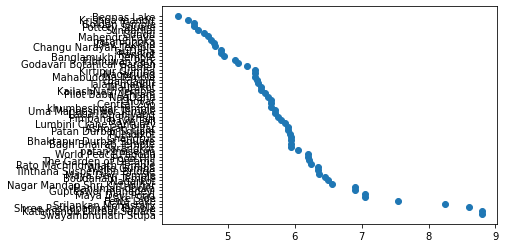

In [37]:
plt.scatter(popular_df['avg_rating'],popular_df['destination'])

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
similarity_scores = cosine_similarity(pt)

In [40]:
similarity_scores.shape

(64, 64)

In [41]:
predicted_values = []
def recommend(location_name):
    temp_list = []
    #index fetch
    index = np.where(pt.index==location_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        item = []
        item_df = pt.index[i[0]]
        
        temp_list.append(item_df)
    predicted_values.append(temp_list)

In [42]:
n_pt = pt.reset_index()
destination_list = n_pt['destination'].values

In [43]:
for d in destination_list:
    recommend(d)

In [44]:
final_df = pd.DataFrame( data = destination_list)

In [45]:
ndf = pd.DataFrame(data=predicted_values)
ndf['place'] = destination_list

In [46]:
pivot_df = ndf.melt(id_vars=["place"], 
        var_name="column",
        value_name="destination").sort_values(by='place')

In [47]:
pivot_df = pivot_df[['place','destination']]
pivot_df.head()

,place,destination
0,Ashokan Pillar,Maya Devi Pond
192,Ashokan Pillar,Mahendra cave
128,Ashokan Pillar,Thamel
256,Ashokan Pillar,Kirtipur Gumba
64,Ashokan Pillar,Maya Devi Temple


In [48]:
new_pivot_df = pivot_df.merge(location,on='destination')

In [49]:
new_pivot_df

,place,destination,location_id,city,description,index,image_url
0,Ashokan Pillar,Maya Devi Pond,12,Lumbini,It is an ancient pond of huge significane loca...,21,https://visitsnepal.com/wp-content/uploads/202...
1,Chilancho Bahal,Maya Devi Pond,12,Lumbini,It is an ancient pond of huge significane loca...,21,https://visitsnepal.com/wp-content/uploads/202...
2,Lumbini Monastic Site,Maya Devi Pond,12,Lumbini,It is an ancient pond of huge significane loca...,21,https://visitsnepal.com/wp-content/uploads/202...
3,Maya Devi Temple,Maya Devi Pond,12,Lumbini,It is an ancient pond of huge significane loca...,21,https://visitsnepal.com/wp-content/uploads/202...
4,Srilankan Monastary,Maya Devi Pond,12,Lumbini,It is an ancient pond of huge significane loca...,21,https://visitsnepal.com/wp-content/uploads/202...
...,...,...,...,...,...,...,...
319,Mahabuddha Temple,Lakuri Bhanjyang,14,Lalitpur,It is a viewpoint/hiking area located in the f...,23,https://www.ghztreks.com/wp-content/uploads/20...
320,Maya Devi Pond,Ashokan Pillar,61,Lumbini,A pillar inscribed by the Great indian emperor...,76,https://thumbs.dreamstime.com/z/ashoka-pillar-...
321,Maya Devi Temple,Ashokan Pillar,61,Lumbini,A pillar inscribed by the Great indian emperor...,76,https://thumbs.dreamstime.com/z/ashoka-pillar-...
322,Srilankan Monastary,Lumbini Monastic Site,48,Lumbini,It the monasic site of Lumbini.One of the larg...,62,https://www.holidify.com/images/cmsuploads/com...


In [50]:
new_pivot_df = new_pivot_df[['place','destination','image_url']]
new_pivot_df = new_pivot_df.sort_values(by='place')

In [51]:
engine = create_engine('mysql+mysqlconnector://root:@localhost:3306/travelwanders')
new_pivot_df.to_sql(name='final_prediction', con=engine, if_exists='replace', index=False)

324

In [52]:
new_pivot_df

,place,destination,image_url
0,Ashokan Pillar,Maya Devi Pond,https://visitsnepal.com/wp-content/uploads/202...
24,Ashokan Pillar,Kirtipur Gumba,https://i.pinimg.com/originals/aa/4c/ad/aa4cad...
13,Ashokan Pillar,Thamel,https://dynamic-media-cdn.tripadvisor.com/medi...
5,Ashokan Pillar,Mahendra cave,https://www.holidify.com/images/cmsuploads/com...
28,Ashokan Pillar,Maya Devi Temple,https://dynamic-media-cdn.tripadvisor.com/medi...
...,...,...,...
145,patan museum,Changu Narayan Temple,https://www.templepurohit.com/wp-content/uploa...
137,patan museum,Pumdikot,https://www.vivaanadventure.com/wp-content/upl...
96,patan museum,patan dhoka,https://dynamic-media-cdn.tripadvisor.com/medi...
118,patan museum,Pimbahal Pokhari,https://preview.redd.it/5ik7g9n53r861.jpg?auto...
